# Matplotlib and Pandas

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

The data for our plot experiments will be again from the [drinks](https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-MLwithPython-Code/code/datasets/drinks.csv) dataset

In [2]:
df = pd.read_csv("../datasets/drinks.csv")

## Get some insight from the data

In [3]:
df.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [4]:
### check for NaN values
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

We have NaN values only in the string fields, which will  not be a problem for now. But lets see which contries does not have a continent assigned:

In [5]:
df.loc[df['continent'].isnull(), ['continent','country']].tail(3)

,continent,country
145,NaN,St. Vincent & the Grenadines
174,NaN,Trinidad & Tobago
184,NaN,USA


In [6]:
# number of countries per continent:
df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [7]:
# average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False)


continent
EU    142.22
SA     62.42
OC     35.62
AF     16.26
AS      9.07
Name: wine_servings, dtype: float64

## Let's start ploting

**Note:** in next examples we will use the [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) method which is a wrapper of  [matplotlib.pylab](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html). And for each plot we will use the corresponding method on the DataFrame.plot accessor. I.e. instead of df.plot(kind='bar') we will use df.plot.bar(), which are equivalent.



### Bar plots
[DataFrame.plot.bar](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html)


#### number of countries in each continent

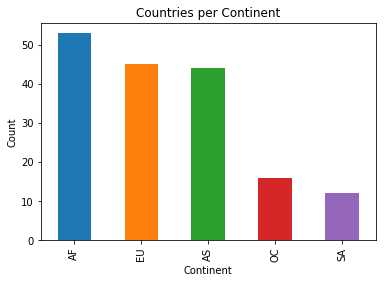

In [8]:
df["continent"].value_counts().plot.bar(title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

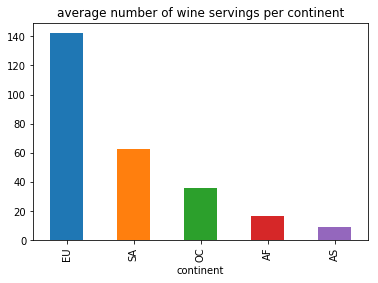

In [9]:
# bar plot average number of wine servings per continent
df.groupby('continent').wine_servings.mean().round(2).sort_values(ascending=False).plot(kind='bar', title='average number of wine servings per continent')

### Histogram

[DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html)

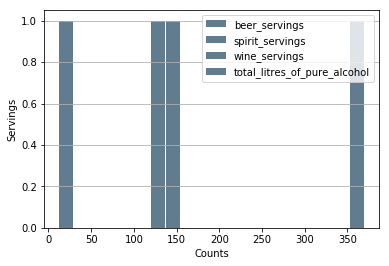

In [10]:
# histogram of wine servings in france
fr = df[df['country'] == 'France']
fr.plot.hist(bins=20, rwidth=0.9,color='#607c8e')
plt.xlabel('Counts')
plt.ylabel('Servings')
plt.grid(axis='y')


### Density plot

[DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.density.html)

Text(0.5, 1.0, 'density plot of wine servings')

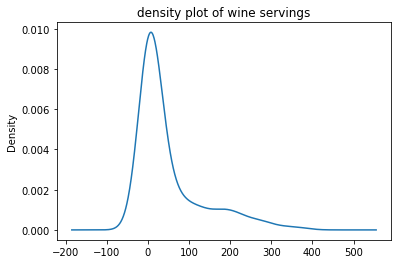

In [11]:
# density plot of wine servings
df['wine_servings'].plot.density()
plt.title('density plot of wine servings')

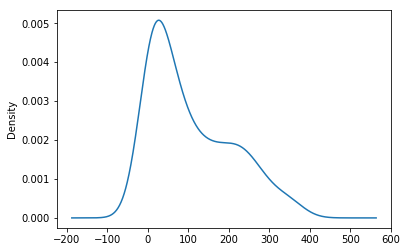

In [12]:
# density plot of beer_servings
df.beer_servings.plot(kind='density')

### Scatter plot

[DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)

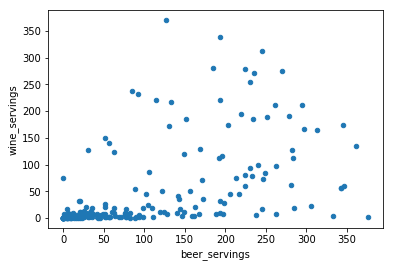

In [13]:
# scatterplot of beer servings versus wine servings
df.plot.scatter(x='beer_servings', y='wine_servings')

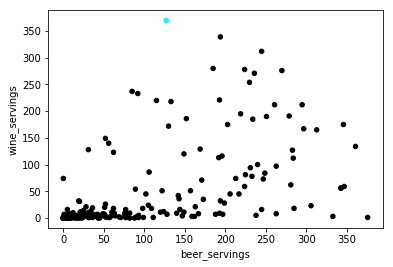

In [14]:
# scatterplot of beer servings versus wine servings (colors by 1 condition)
# np.where(cond, A, B) works like: if(cond)? then A : else B, but on each element of the np.array

# assign a cyan color for France:
color_france = np.where(df.country=='France', 'cyan', 'black')
df.plot.scatter(x='beer_servings', y='wine_servings',color=color_france)

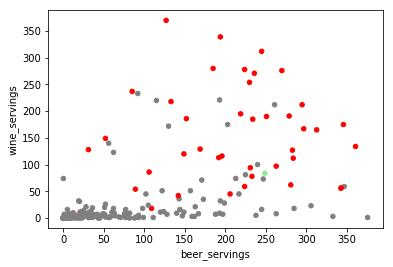

In [15]:
# scatterplot of beer servings versus wine servings (colors more of 1 condition)

# lets make a colors array, which will hold different color values for countries we are interested.
# for the rest - the default color will be 'gray'
colors = np.full_like(df.country, 'gray')

# assign red color for the EU countries:
colors[np.nonzero(df.continent=="EU")] = "red"
# assign lightgreen color for the USA:
colors[np.nonzero(df.country=="USA")] = "lightgreen"

df.plot.scatter(x='beer_servings', y='wine_servings',color=colors)

In [16]:
pd.DataFrame()

""


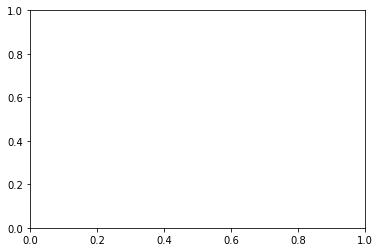

In [17]:
# scatterplot of beer servings versus wine servings (colors for each country)
df['continent'].fillna('Other', inplace=True)
groups = np.unique(df['continent'])

fig, ax = plt.subplots()

# for group in groups:
        
